In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
#import all NBA CSVs

nba_overall = pd.read_csv('../data/NBAOVerall.csv')
nba_c = pd.read_csv('../data/NBA_C.csv')
nba_sg = pd.read_csv('../data/NBA_SG.csv')
nba_pf = pd.read_csv('../data/NBA_PF.csv')
nba_g = pd.read_csv('../data/NBA_G.csv')
nba_f = pd.read_csv('../data/NBA_F.csv')
nba_pg = pd.read_csv('../data/NBA_PG.csv')
nba_sf = pd.read_csv('../data/NBA_SF.csv')

### exploratory analysis of NBA

In [27]:
nba_overall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Rank                100 non-null    object
 1   Player              100 non-null    object
 2   Pos                 100 non-null    object
 3   TeamCurrently With  100 non-null    object
 4   AgeAt Signing       100 non-null    int64 
 5   Start               100 non-null    int64 
 6   End                 100 non-null    int64 
 7   Yrs                 100 non-null    int64 
 8   Value               100 non-null    object
 9   AAV                 100 non-null    object
 10  Team                100 non-null    object
dtypes: int64(4), object(7)
memory usage: 8.7+ KB


In [41]:
#nba_overall = nba_overall['Value'].astype(str).astype(float).astype(int)

#nba_overall["Value"] = [float(str(i).replace(",", "")) for i in nba_overall["Value"]]

#nba_overall['Salary'] = nba_overall["Value"].replace("$", "")
#nba_overall

nba_overall[nba_overall.Value[1:]] = nba_overall[nba_overall.Value[1:]].replace('[\$,]', '', regex=True).astype(float)

KeyError: "None of [Index(['$276,122,630', '$251,019,650', '$245,340,000', '$245,340,000',\n       '$228,200,420', '$221,088,000', '$221,088,000', '$215,353,664',\n       '$215,159,700', '$215,159,700', '$215,159,700', '$213,280,928',\n       '$205,000,002', '$204,450,000', '$197,230,450', '$197,230,450',\n       '$197,230,450', '$197,230,450', '$194,219,320', '$189,903,600',\n       '$189,903,600', '$186,016,000', '$180,000,000', '$179,299,750',\n       '$179,299,750', '$177,243,360', '$177,130,800', '$176,265,466',\n       '$176,265,152', '$175,883,400', '$163,000,300', '$163,000,300',\n       '$163,000,300', '$163,000,300', '$160,000,000', '$158,253,000',\n       '$158,253,000', '$149,650,000', '$146,396,031', '$136,905,216',\n       '$135,000,000', '$134,400,000', '$132,929,128', '$131,000,000',\n       '$128,539,845', '$128,000,000', '$125,000,000', '$120,000,000',\n       '$120,000,000', '$120,000,000', '$120,000,000', '$117,089,280',\n       '$114,070,207', '$112,912,800', '$109,000,002', '$107,000,000',\n       '$104,720,000', '$104,000,000', '$100,000,000', '$100,000,000',\n       '$100,000,000', '$99,023,288', '$96,258,694', '$94,500,000',\n       '$94,000,000', '$93,000,000', '$90,900,000', '$90,000,000',\n       '$90,000,000', '$90,000,000', '$90,000,000', '$86,640,001',\n       '$86,000,001', '$82,500,000', '$81,900,000', '$80,915,280',\n       '$80,000,000', '$80,000,000', '$78,000,000', '$76,487,996',\n       '$75,000,000', '$74,000,000', '$73,000,000', '$72,000,000',\n       '$70,950,000', '$70,000,000', '$70,000,000', '$70,000,000',\n       '$69,600,000', '$68,640,000', '$68,000,000', '$67,470,906',\n       '$65,000,000', '$63,999,999', '$62,297,040', '$61,980,000',\n       '$60,000,000', '$60,000,000', '$60,000,000'],\n      dtype='object')] are in the [columns]"

In [4]:
nba_overall.head()

,Rank,Player,Pos,TeamCurrently With,AgeAt Signing,Start,End,Yrs,Value,AAV,Team
0,1,Jaylen Brown,SF,BOS BOS,26,2024,2028,5,"$286,230,000","$57,246,000",BOS
1,2,Nikola Jokic,C,DEN DEN,27,2023,2027,5,"$276,122,630","$55,224,526",DEN
2,3,Bradley Beal,SG,PHX PHX,29,2022,2026,5,"$251,019,650","$50,203,930",PHX
3,T4,Anthony Edwards,SG,MIN MIN,21,2024,2028,5,"$245,340,000","$49,068,000",MIN
4,T4,Tyrese Haliburton,PG,IND IND,23,2024,2028,5,"$245,340,000","$49,068,000",IND


In [5]:
nba_overall.value_counts('Pos')

#shooting guards are the position with the most top 100 salaries for NBA

Pos
SG    26
PG    24
PF    20
SF    16
C     14
Name: count, dtype: int64

<Axes: xlabel='Pos', ylabel='Count'>

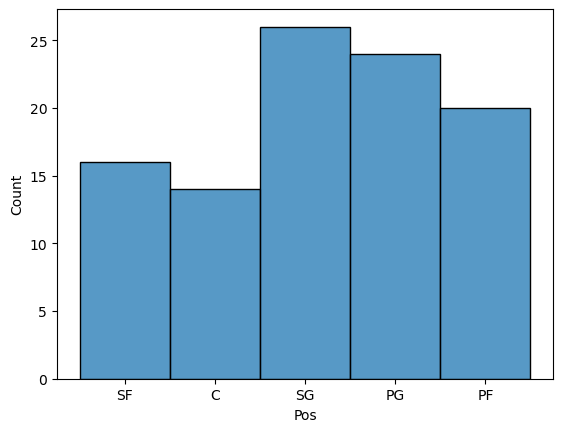

In [6]:
#histogram for nba_overall pos
sns.histplot(data=nba_overall, x='Pos')

In [7]:
nba_g.value_counts('Pos')

#shooting guards also have the highest number of top 100 salaries of all guards

Pos
SG    56
PG    44
Name: count, dtype: int64

In [10]:
nba_g.aggregate(['max','min'])

,Rank,Player,Pos,TeamCurrently With,AgeAt Signing,Start,End,Yrs,Value,AAV,Team
max,T68,Zach LaVine,SG,WAS WAS,36,2025,2028,5,"$96,258,694","$9,423,869",WAS
min,1,Alec Burks,PG,ATL ATL,18,2019,2023,2,"$100,000,000","$10,002,122",ATL


In [17]:
nba_overall.value_counts('Team')

Team
ATL    5
GSW    5
PHX    5
MIL    5
MIA    5
BOS    5
CLE    4
LAC    4
NYK    4
MEM    4
MIN    4
CHI    4
DEN    4
OKC    3
POR    3
LAL    3
BKN    3
UTA    3
DAL    3
NOP    3
SAC    3
PHI    3
TOR    2
SAS    2
IND    2
HOU    2
DET    2
CHA    2
WAS    2
ORL    1
Name: count, dtype: int64

In [20]:
nba_overall.groupby('Team')['Value'].sum()

Team
ATL    $215,159,700$114,070,207$90,000,000$68,000,000...
BKN                   $177,243,360$94,500,000$90,900,000
BOS    $286,230,000$163,000,300$134,400,000$70,000,00...
CHA                              $204,450,000$80,000,000
CHI        $215,159,700$81,900,000$80,000,000$60,000,000
CLE      $197,230,450$163,000,300$100,000,000$62,297,040
DAL                  $215,159,700$120,000,000$75,000,000
DEN      $276,122,630$179,299,750$158,253,000$86,640,001
DET                               $73,000,000$60,000,000
GSW    $215,353,664$189,903,600$120,000,000$109,000,0...
HOU                              $128,539,845$86,000,001
IND                             $245,340,000$136,905,216
LAC       $176,265,466$149,650,000$90,000,000$68,640,000
LAL                  $189,903,600$177,130,800$99,023,288
MEM      $197,230,450$197,230,450$104,720,000$76,487,996
MIA    $163,000,300$146,396,031$120,000,000$96,258,69...
MIL    $228,200,420$176,265,152$175,883,400$112,912,8...
MIN     $245,340,000$221,0

In [11]:
#import all NHL CSVs

nhl_overall = pd.read_csv('../data/NHLOVerall.csv')
nhl_f = pd.read_csv('../data/NHL_F.csv')
nhl_c = pd.read_csv('../data/NHL_C.csv')
nhl_lw = pd.read_csv('../data/NHL_LW.csv')
nhl_rw = pd.read_csv('../data/NHL_RW.csv')
nhl_d = pd.read_csv('../data/NHL_D.csv')
nhl_g = pd.read_csv('../data/NHL_G.csv')

### exploratory analysis of NHL 

#### note F(forward) contains C, RW, LW

In [12]:
nhl_overall.value_counts('Pos')

#forwards, specifically centers, are the position with the most top 100 salaries for NHL

Pos
C     36
D     34
LW    16
RW     8
G      6
Name: count, dtype: int64

In [13]:
#import all WNBA CSVs

wnba_overall = pd.read_csv('../data/WNBAOVerall.csv')
wnba_g = pd.read_csv('../data/WNBA_G.csv')
wnba_c = pd.read_csv('../data/WNBA_C.csv')
wnba_f = pd.read_csv('../data/WNBA_F.csv')

### exploratory analysis of WNBA

In [14]:
wnba_overall.value_counts('Pos')

#guards are the position with the most top 100 salaries for WNBA

Pos
G    56
F    29
C    15
Name: count, dtype: int64

In [15]:
#import all MLB CSVs

mlb_overall = pd.read_csv('../data/MLBOverall.csv')
mlb_inf = pd.read_csv('../data/MLB_INF.csv')
mlb_of = pd.read_csv('../data/MLB_OF.csv')
mlb_c = pd.read_csv('../data/MLB_C.csv')
mlb_1b = pd.read_csv('../data/MLB_1B.csv')
mlb_2b = pd.read_csv('../data/MLB_2B.csv')
mlb_3b = pd.read_csv('../data/MLB_3B.csv')
mlb_ss = pd.read_csv('../data/MLB_SS.csv')
mlb_rf = pd.read_csv('../data/MLB_RF.csv')
mlb_cf = pd.read_csv('../data/MLB_CF.csv')
mlb_lf = pd.read_csv('../data/MLB_LF.csv')
mlb_p = pd.read_csv('../data/MLB_P.csv')


In [16]:
# import all EPL CSVs

epl_overall = pd.read_csv('../data/EPLOverall.csv')
epl_f = pd.read_csv('../data/EPL_F.csv')
epl_m = pd.read_csv('../data/EPL_M.csv')
epl_d = pd.read_csv('../data/EPL_D.csv')
epl_gk = pd.read_csv('../data/EPL_GK.csv')

In [ ]:
# what city/franchise spends the most on atheltes?